In [2]:
#John David Conley
#Machine Learning
#Assignment 4
#11-1-2022
#https://github.com/DavidConley/machinelearning04

In [3]:
#Programming elements:
#Linear Regression, K-Means Clustering and Data Analysis
#In class programming:
#1. Apply Linear Regression to the provided dataset using underlying steps.
##a. Import the given “Salary_Data.csv”
##b. Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset.
##c. Train and predict the model.
##d. Calculate the mean_squared error
##e. Visualize both train and test data using scatter plot.
#2. Apply K means clustering in the dataset provided:
##• Remove any null values by the mean.
##• Use the elbow method to find a good number of clusters with the K-Means algorithm
##• Calculate the silhouette score for the above clustering
#3. Try feature scaling and then apply K-Means on the scaled features. Did that improve the Silhouette score? If
#   Yes, can you justify why
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
from sklearn.cluster import KMeans
from sklearn import metrics, preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

In [4]:
#1
##a
dataset = pd.read_csv('Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
##b
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.33,random_state = 0)
x_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9]])

In [6]:
##c
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [7]:
##d
mean_squared_error(y_test,y_pred)

21026037.329511296

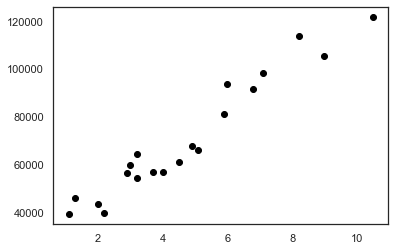

In [8]:
##e
plt.plot(x_train, y_train, 'o', color='black')

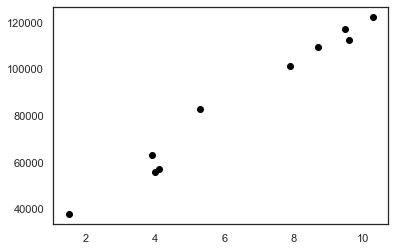

In [9]:
plt.plot(x_test, y_test, 'o', color='black')

In [10]:
#2
dataset2 = pd.read_csv('K-Mean_Dataset.csv')
dataset2

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [11]:
print(dataset2.isnull().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [12]:
#2-1
dataset2A = dataset2.fillna(dataset2.mean())
dataset2A

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


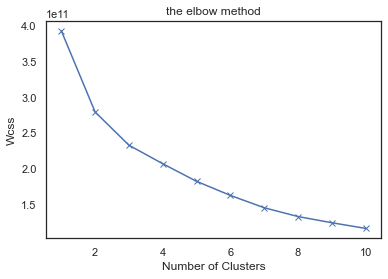

In [13]:
#2-2
dataset2B = dataset2A.drop(['CUST_ID'], axis=1)
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(dataset2B)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss, 'bx-')
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [14]:
for key, val in dataset2B.items():
    print(f'{key} : {val}')

BALANCE : 0         40.900749
1       3202.467416
2       2495.148862
3       1666.670542
4        817.714335
           ...     
8945      28.493517
8946      19.183215
8947      23.398673
8948      13.457564
8949     372.708075
Name: BALANCE, Length: 8950, dtype: float64
BALANCE_FREQUENCY : 0       0.818182
1       0.909091
2       1.000000
3       0.636364
4       1.000000
          ...   
8945    1.000000
8946    1.000000
8947    0.833333
8948    0.833333
8949    0.666667
Name: BALANCE_FREQUENCY, Length: 8950, dtype: float64
PURCHASES : 0         95.40
1          0.00
2        773.17
3       1499.00
4         16.00
         ...   
8945     291.12
8946     300.00
8947     144.40
8948       0.00
8949    1093.25
Name: PURCHASES, Length: 8950, dtype: float64
ONEOFF_PURCHASES : 0          0.00
1          0.00
2        773.17
3       1499.00
4         16.00
         ...   
8945       0.00
8946       0.00
8947       0.00
8948       0.00
8949    1093.25
Name: ONEOFF_PURCHASES, Length: 8950

In [15]:
#2-3
kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(dataset2B)
y_cluster_kmeans = kmeans2.predict(dataset2B)
score = metrics.silhouette_score(dataset2B, y_cluster_kmeans)
print(score)

0.4654852990070092


In [16]:
#3
scaler = preprocessing.StandardScaler()
scaler.fit(dataset2B)
d2B_scaled_array = scaler.transform(dataset2B)
d2B_scaled = pd.DataFrame(d2B_scaled_array, columns = dataset2B.columns)

kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(d2B_scaled)
y_cluster_kmeans = kmeans2.predict(d2B_scaled)
score2 = metrics.silhouette_score(d2B_scaled, y_cluster_kmeans)
print(score2)

0.25055570796307736


In [17]:
print("Depends on what one considers improved. I personally would say no, because closer to 1 means the clusters are better separated.")

Depends on what one considers improved. I personally would say no, because closer to 1 means the clusters are better separated.
